# 高斯-大津-标记
到目前为止，我们已经使用了诸如高斯模糊等滤波器、大津法等阈值算法，并使用连通组件标记来标记对象。这三种算法的组合特别常见，以至于有便捷函数可以一次性执行这三个操作。这种图像分割工作流是一种非常简单的方法，例如用于检测和分割荧光显微镜图像中的细胞核。如果对象不太密集，这种方法会很有效。

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle

为了演示这个工作流程，我们使用来自[Broad生物图像挑战](https://bbbc.broadinstitute.org/BBBC022)的图像数据：
我们使用了图像集BBBC022v1 [Gustafsdottir et al., PLOS ONE, 2013](http://dx.doi.org/10.1371/journal.pone.0080999)，该数据集可从Broad生物图像基准集合获得 [Ljosa et al., Nature Methods, 2012](http://dx.doi.org/10.1038/nmeth.2083)。

我们加载图像，并出于可视化目的，裁剪出一个子区域：

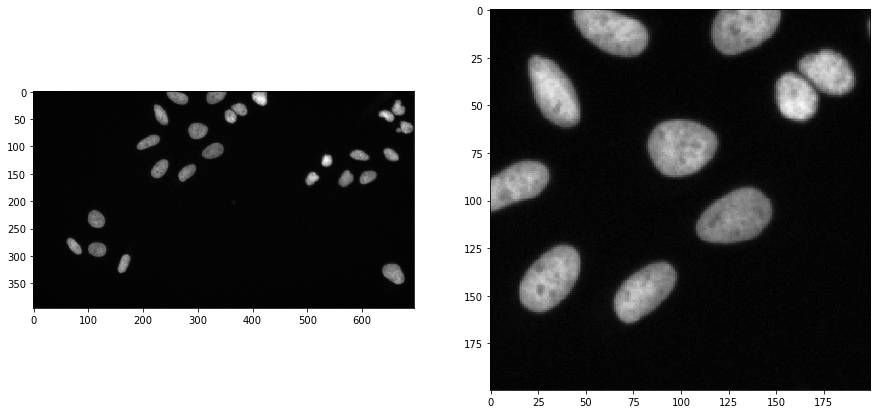

In [2]:
input_image = imread("../../data/BBBC022/IXMtest_A02_s9.tif")[:,:,0]

input_crop = input_image[0:200, 200:400]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(input_image, plot=axs[0])
cle.imshow(input_crop, plot=axs[1])

## 应用算法
高斯-大津-标记是[pyclesperanto](https://github.com/clesperanto/pyclesperanto_prototype/)和可编写脚本的napari插件[napari-segment-blobs-and-things-with-membranes](https://github.com/haesleinhuepf/napari-segment-blobs-and-things-with-membranes)中的一个命令。该操作有一个`outline_sigma`参数，用于控制分割对象轮廓的精确度。

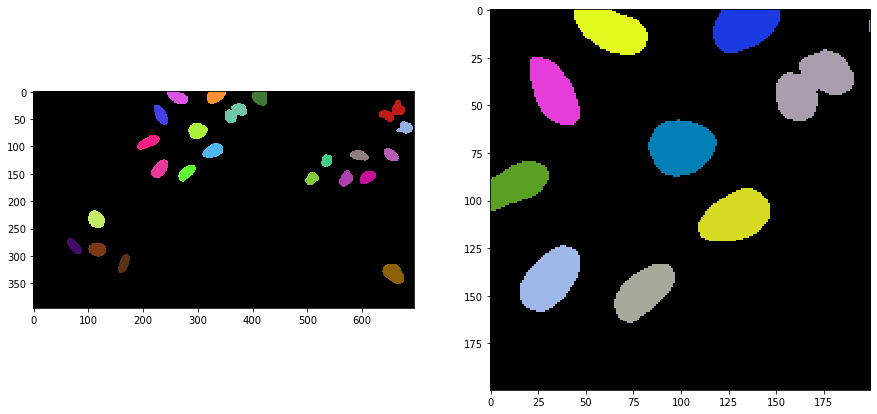

In [3]:
sigma_outline = 1

segmented = cle.gauss_otsu_labeling(input_image, outline_sigma=sigma_outline)
segmented_crop = segmented[0:200, 200:400]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(segmented, labels=True, plot=axs[0])
cle.imshow(segmented_crop, labels=True, plot=axs[1])

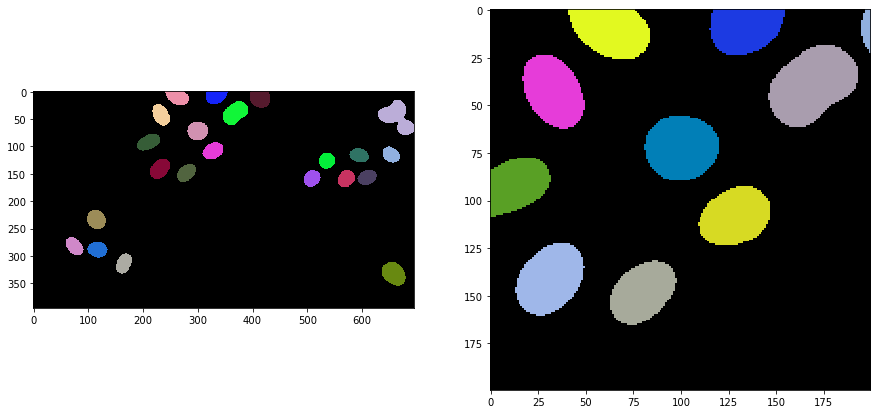

In [4]:
sigma_outline = 7

segmented = cle.gauss_otsu_labeling(input_image, outline_sigma=sigma_outline)
segmented_crop = segmented[0:200, 200:400]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(segmented, labels=True, plot=axs[0])
cle.imshow(segmented_crop, labels=True, plot=axs[1])

如你所见，如果对象太靠近，它们将被一起分割。在这些情况下，建议尝试[Voronoi-大津-标记](https://github.com/clEsperanto/pyclesperanto_prototype/blob/master/demo/segmentation/voronoi_otsu_labeling.ipynb)。